In [11]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [12]:
## 1.36 ,0.2, 0.00136, 0.00027, 0.036, 0.33, 2, 100, 0.1  
def make_system(Γ, τ, μ, β, α, δ, σ, π, ρ):
    init = State(R=200 , V=100 , E=0 , L=0, CD4=0)
    
    t0 = 0
    t_end =120
    
    return System(init=init, t0=t0, t_end=t_end, Γ=Γ, τ=τ, μ=μ, β=β, α=α, δ=δ, σ=σ, π=π, ρ=ρ)

In [13]:
def upd_func1(state,t, system):
    unpack(system)
    r, v, e, l = state
    
    r += (Γ*τ - μ*r - β*r*v)
    return State(R=r, V=v, E=e, L=l)

In [14]:
def upd_func2(state,t, system):
    unpack(system)
    r, v, e, l = state
    
    l += (ρ*β*r*v -μ*l -α*l)
    return State(R=r, V=v, E=e, L=l)

In [15]:
def upd_func3(state,t, system):
    unpack(system)
    r, v, e, l = state
    
    e += (1-ρ)*β*r*v+α*l-δ*e
    return State(R=r, V=v, E=e, L=l)

In [16]:
def upd_func4(state,t, system):
    unpack(system)
    r, v, e, l = state
    
    v += π*e - σ*v
    return State(R=r, V=v, E=e, L=l)

In [17]:
def update_func(state,t, system):
    unpack(system)
    r, v, e, l, cd4 = state
    
    Ri= r
    Vi= v
    Ei= e
    Li= l
    dt = 0.3
    
    r += ((Γ*τ) - (μ*Ri) - (β*Ri*Vi)) *dt
    
    l += ((ρ*β*Ri*Vi) - (μ*Li) -(α*Li)) *dt
    
    e += (((1-ρ)*β*Ri*Vi)+(α*Li)-(δ*Ei)) *dt
    
    v += ((π*Ei) - (σ*Vi)) *dt
    cd4 = 1000*(1-τ)+Ri+Li+Ei
     
    return State(R=r, V=v, E=e, L=l, CD4=cd4)

In [18]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [19]:
system = make_system(1.36 ,0.2, 0.00136, 0.00027, 0.036, 0.33, 2, 100, 0.1)
results = run_simulation(system, update_func)

,R,V,E,L,CD4
0,200,100,0,0,0
1,198.38,40,1.458,0.162,1000
2,197.738,59.74,1.89388,0.224459,1000
3,196.782,80.7125,2.56997,0.317628,999.856
4,195.497,109.384,3.47683,0.442718,999.67
5,193.767,148.058,4.69632,0.610969,999.416
6,191.445,200.113,6.32939,0.8365,999.074
7,188.346,269.927,8.50466,1.13744,998.611
8,184.232,363.111,11.3812,1.53649,997.988
9,178.82,486.68,15.1478,2.06114,997.15


In [20]:
def plot_results1(CD4):
    """Plot the results of a SIR model.
    
    """
    plot(CD4, '-', label='CD4')
    decorate(xlabel='Time (days)',
             ylabel='CD4 lymphocytes')

In [21]:
def plot_results2(V):
    """Plot the results of a SIR model.
    
    """
    plot(V, '-', label='free virions')
    decorate(xlabel='Time (days)',
             ylabel='free virions')

In [22]:
def plot_results3(R):
    """Plot the results of a SIR model.
    
    """
    plot(R, '-', label='R')
    
    decorate(xlabel='Time (days)',
             ylabel='R')

In [23]:
def plot_results4(L,E):
    """Plot the results of a SIR model.
    
    """
    plot(L, '--', label='L')
    plot(E, '-', label='E')
    decorate(xlabel='Time (days)',
             ylabel='L&E')

In [28]:
def plot_results5(L,E,R):
    """Plot the results of a SIR model.
    
    """
    plot(L, '--', label='L')
    plot(E, '-', label='E')
    plot(R, '-', label='R')
    decorate(xlabel='Time (days)',
             ylabel='L,E&R')

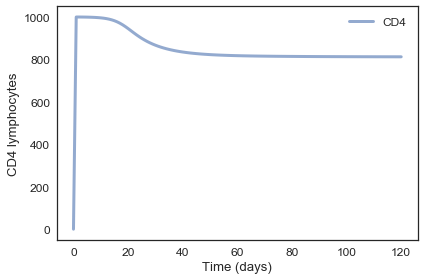

In [29]:
plot_results1(results.CD4)

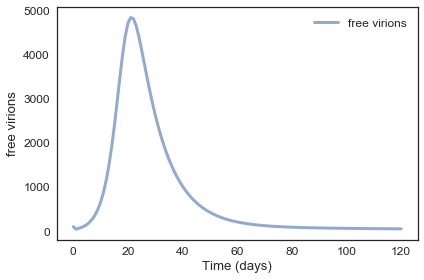

In [30]:
plot_results2(results.V)

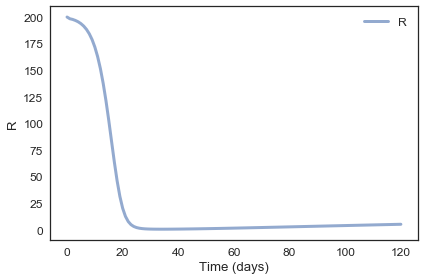

In [26]:
plot_results3(results.R)

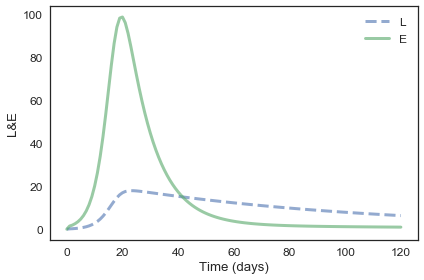

In [27]:
plot_results4(results.L, results.E)

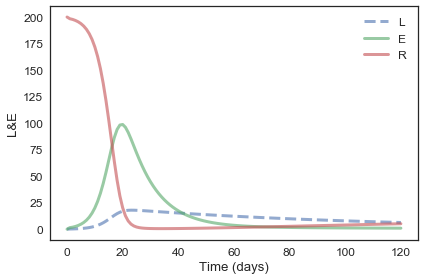

In [31]:
plot_results5(results.L, results.E, results.R)